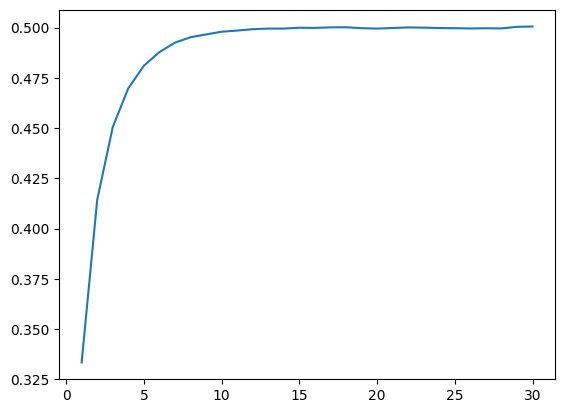

In [41]:
import numpy as np
import ucamcl
import matplotlib.pyplot as plt

def pairs(N):
    assert(N%2 == 0)
    SourceArray = np.arange(0, N)
    np.random.shuffle(SourceArray)    
    return (SourceArray[:N//2], SourceArray[N//2:])

def kinetic_exchange(v, w):
    R = np.random.rand(len(v))
    InverseR = np.subtract(np.ones(len(R)), R)
    Sum = np.add(v, w)
    return (np.multiply(R, Sum), np.multiply(InverseR, Sum))

def gini(w):
    Top = np.cumsum(np.multiply(np.arange(1, len(w)+1), np.sort(w)))[len(w) - 1]
    Bottom = np.cumsum(w)[len(w) - 1]
    return (2 / len(w)) *  (Top / Bottom) - 1 - 1 / len(w)

def sim(N, T):
    Wealths = np.ones(N)
    GiniCoefficients = np.empty(T)
    for i in range(T):
        Pairings = pairs(N)
        V = np.take(Wealths, Pairings[0])
        W = np.take(Wealths, Pairings[1])
        newV, newW = kinetic_exchange(V, W)
        np.put(Wealths, Pairings[0], newV)
        np.put(Wealths, Pairings[1], newW)
        GiniCoefficients[i] = gini(Wealths)
    
    return (Wealths, GiniCoefficients)

def plot():  
    W, Gs = sim(500000, 30)
    T = list(range(1, 31))
    plt.plot(T, Gs)

plot()